In [1]:
## What to import
import requests  ## for getting data from a server
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related


## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

import PIL
#import Pillow
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation 
import matplotlib.pyplot as plt
import seaborn as sns


## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
#import graphviz

import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_samples, silhouette_score

## For Stemming
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#!pip install --upgrade Pillow

In [3]:
topics = ["Veganism","Supplement","CrueltyFree","Meat"]
Endpoint = "https://newsapi.org/v2/everything"
Appikey = "2507730edc7f4b71bc88809641612caa"
path = 'C:/Users/Sanchu/Desktop/MS/ML/TextMining'

In [4]:
###Extracting the data from the api
###Creating corpus with the description as the content in the .txt file
Content = []
Labels = []
with open( path +"/"+"Vegan_News.csv", "w+", encoding="utf-8") as file_obj:
    for topic in topics :
        response=requests.get(Endpoint, {'apiKey':Appikey,'q':topic})
        print(response)
        jsontxt = response.json()
        print(jsontxt)
        for i,article in enumerate(jsontxt["articles"]):
            description = jsontxt["articles"][i]['description']
            description=str(description)
            description=re.sub(r'[,.;@#?!&$\-\']+', ' ', description, flags=re.IGNORECASE)
            description=re.sub(' +', ' ', description, flags=re.IGNORECASE)
            description=re.sub(r'\"', ' ', description, flags=re.IGNORECASE)
            description=re.sub(r'[^a-zA-Z]', " ", description, flags=re.VERBOSE)
            ## Be sure there are no commas in the headlines or it will
            ## write poorly to a csv file....
            description=description.replace(',', '')
            description=' '.join(description.split())
            descriptionfinal=re.sub("\n|\r", "", description)
            labels = topic
            Content.append(descriptionfinal)
            Labels.append(labels)
            row = str(labels)+ "," + str(descriptionfinal) +"\n"
            file_obj.write(row) 

<Response [200]>
{'status': 'ok', 'totalResults': 134, 'articles': [{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Jude Whiley', 'title': 'Yes, Lab-Grown Meat Is Vegan', 'description': 'This new technology offers an opportunity to free animals from exploitation. So why are some vegans opposed to it?', 'url': 'https://www.wired.com/story/lab-grown-meat-vegan-ethics-environment/', 'urlToImage': 'https://media.wired.com/photos/63f014607d87edd2f4f35129/191:100/w_1280,c_limit/ideas_labgrown_meat_vegan_animals_ethics.jpg', 'publishedAt': '2023-02-19T12:00:00Z', 'content': 'I wish I came to veganism through an epiphany about the right to personhood of animals, or recognition of the environmental harm that animal farming causes. But I didnt. What turned me vegan was a ni… [+3568 chars]'}, {'source': {'id': None, 'name': 'The Guardian'}, 'author': 'Peter Godfrey-Smith', 'title': 'My body resists veganism. What’s the most ethical alternative?', 'description': 'A vegan diet can be hard t

In [5]:
data = pd.read_csv("C:/Users/Sanchu/Desktop/MS/ML/TextMining/Vegan_News.csv",header=None , names = ['Label','Headline'])
data.head()

,Label,Headline
0,Veganism,This new technology offers an opportunity to f...
1,Veganism,A vegan diet can be hard to adopt even if you ...
2,Veganism,Can innovative cooks and entrepreneurs take th...
3,Veganism,Agnieszka has been vegan for a year but slips ...
4,Veganism,It s not a failure of collective willpower tha...


In [6]:
data.isna().sum()

Label       0
Headline    1
dtype: int64

In [7]:
data = data.dropna()
data.isna().sum()

Label       0
Headline    0
dtype: int64

In [8]:
A_STEMMER=PorterStemmer()

In [9]:
def MY_STEMMER(str_input):
    ## Only use letters, no punct, no nums, make lowercase...
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [A_STEMMER.stem(word) for word in words] ## Use the Stemmer...
    return words

max_features=1000,

In [10]:
TFid_Vec=TfidfVectorizer(analyzer='word', stop_words="english",ngram_range = (1,1))
TFid_Vec_fit = TFid_Vec.fit_transform(data['Headline'])
TF_DF_Colnames=TFid_Vec.get_feature_names_out()
DF_TF=pd.DataFrame(TFid_Vec_fit.toarray(),columns=TF_DF_Colnames)
DF_TF

,abby,abc,abduzeedo,aber,ability,able,abo,absol,abstract,accelerating,...,yili,york,yorkshire,young,yourselfwhen,youth,yr,zanandi,zimbabwe,zoos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.217229,0.0,0.0,0.0,0.217229,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [11]:
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(DF_TF)

In [12]:
print(pca_matrix)

[[-7.58789415e-02  4.71085699e-03]
 [-4.83771281e-02 -6.37871202e-02]
 [-2.48338799e-02 -3.40313631e-02]
 [-7.16927986e-02 -8.67801505e-02]
 [-4.82974344e-02 -2.86803601e-02]
 [-4.23052396e-02 -2.19835941e-02]
 [ 3.84138980e-02  2.11287542e-03]
 [-4.97647914e-02  1.11628028e-02]
 [-6.63542386e-02 -3.00609551e-02]
 [-4.44035038e-02 -2.12817135e-02]
 [-2.04703969e-02  1.63214978e-02]
 [ 3.36539688e-01  2.21967484e-01]
 [-4.91293008e-02 -1.50614354e-02]
 [-5.62840219e-02 -3.32259410e-02]
 [-5.16540767e-02 -1.26154535e-02]
 [ 2.29362149e-01  1.50694080e-01]
 [-5.45365234e-02 -8.68185969e-02]
 [ 6.04899076e-01 -2.70560013e-01]
 [-7.41190982e-02 -4.84785482e-02]
 [-5.60731679e-02 -1.47916365e-02]
 [-5.01836033e-02  1.28412934e-03]
 [-2.30124798e-02  2.68026414e-01]
 [-5.07310458e-02 -9.68553747e-03]
 [ 3.35295433e-01  1.30358104e-01]
 [-1.69197933e-02 -1.91959941e-03]
 [-5.53078200e-02 -2.83403691e-03]
 [ 3.93828890e-01 -1.92315056e-02]
 [-1.33902077e-02 -1.07185111e-02]
 [-4.57562663e-02  3

In [13]:
kmeans_object5C = sklearn.cluster.KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300)
kmeans_object3C = sklearn.cluster.KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300)
kmeans_object7C = sklearn.cluster.KMeans(n_clusters=7,init='k-means++',n_init=10,max_iter=300)
kmeans_object9C = sklearn.cluster.KMeans(n_clusters=9,init='k-means++',n_init=10,max_iter=300)

In [14]:
pip install --upgrade numpy==1.21.4

Note: you may need to restart the kernel to use updated packages.


In [15]:
kmeans_3C=kmeans_object3C.fit(DF_TF)
kmeans_5C=kmeans_object5C.fit(DF_TF)
kmeans_7C=kmeans_object7C.fit(DF_TF)
kmeans_9C=kmeans_object9C.fit(DF_TF)

# Get cluster assignment labels
labels3C =kmeans_3C.labels_
labels5C =kmeans_5C.labels_
labels7C =kmeans_7C.labels_
labels9C =kmeans_9C.labels_

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

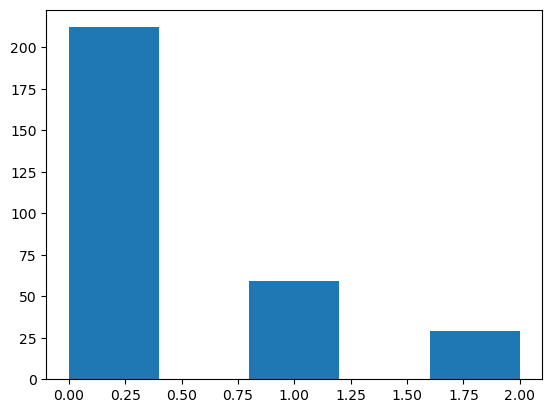

In [16]:
plt.hist(labels3C, bins=5)
plt.show()

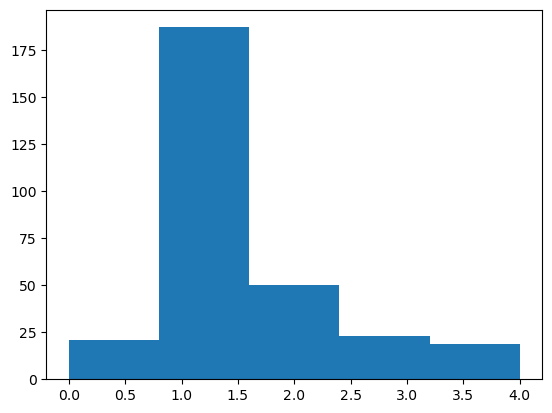

In [17]:
plt.hist(labels5C, bins=5)
plt.show()

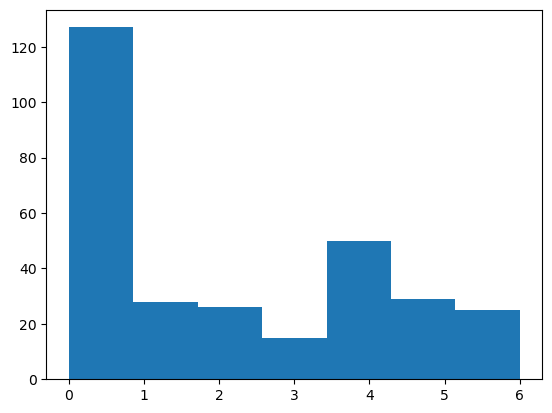

In [30]:
plt.hist(labels7C, bins=7)
plt.show()

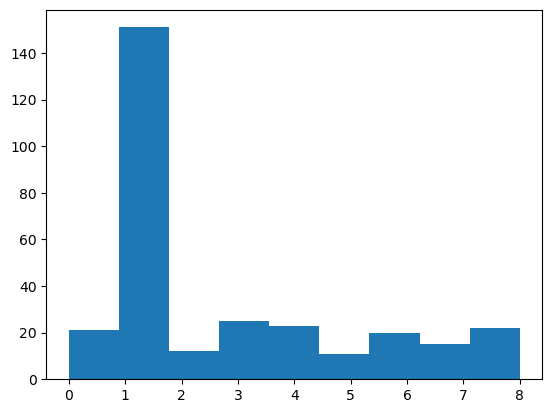

In [31]:
plt.hist(labels9C, bins=9)
plt.show()

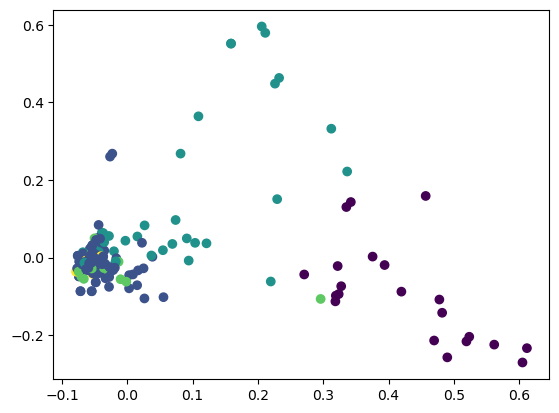

In [20]:
data['pca1'] = pca_matrix[:, 0]
data['pca2'] = pca_matrix[:, 1]

# plot the scatter plot with colored clusters
plt.scatter(data['pca1'], data['pca2'], c=labels5C)
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(DF_TF)

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, n_init=10)

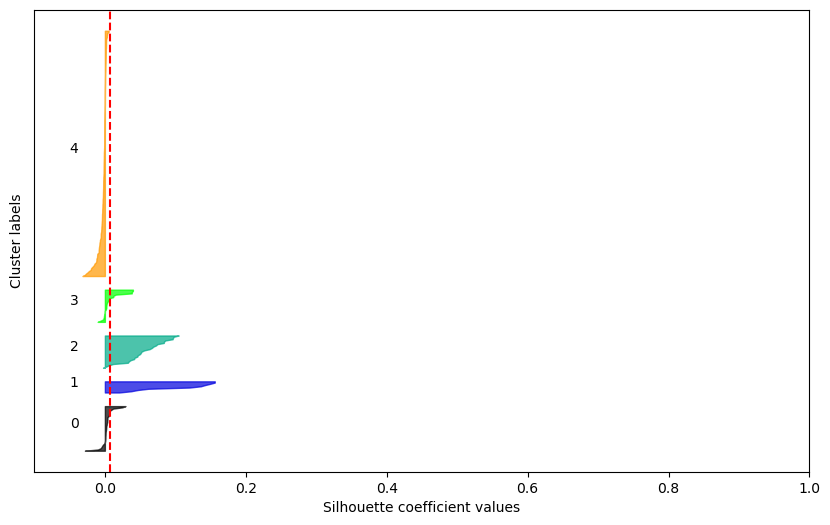

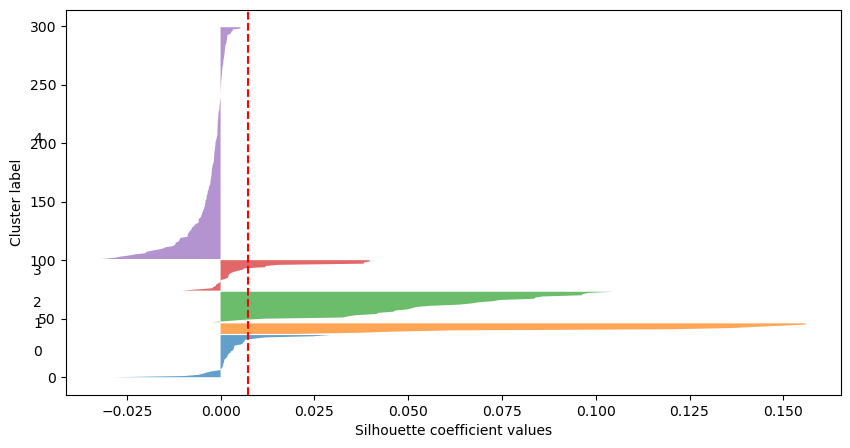

In [22]:
# calculate the silhouette scores
silhouette_avg = silhouette_score(DF_TF, kmeans.labels_)
silhouette_samples = silhouette_samples(DF_TF, kmeans.labels_)

# create a horizontal bar chart of the silhouette scores
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(5):
    # aggregate the silhouette scores for samples belonging to cluster i
    cluster_silhouette_vals = silhouette_samples[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()

    # compute the size of each cluster
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    # create a horizontal bar chart of the silhouette scores for cluster i
    color = plt.cm.nipy_spectral(float(i) / 5)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_xlabel('Silhouette coefficient values')
ax.set_ylabel('Cluster labels')
ax.axvline(x=silhouette_avg, color='red', linestyle='--')
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()


# Plot the silhouette line graph
y_lower, y_upper = 0, 0
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(5):
    ith_silhouette_vals = silhouette_samples[kmeans.labels_ == i]
    ith_silhouette_vals.sort()
    size_cluster_i = ith_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_vals, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower += size_cluster_i

# Plot the average silhouette score as a vertical line
avg_score = np.mean(silhouette_samples)
ax.axvline(x=avg_score, color='red', linestyle='--')
ax.set_xlabel('Silhouette coefficient values')
ax.set_ylabel('Cluster label')
plt.show()

In [23]:
#!pip install -- pyLDAvis

In [24]:
CountVec_tweet = CountVectorizer(analyzer='word',max_features=1000,stop_words="english")
CountVec_tweet_Fit = CountVec_tweet.fit_transform(data['Headline'])
DF_Col_tweet = CountVec_tweet.get_feature_names_out()
CountVec_tweet_DF=pd.DataFrame(CountVec_tweet_Fit.toarray(),columns=DF_Col_tweet)
#CountVec_tweet_DF.insert(0,'Label',Veganism_Final_DF['topic'])
CountVec_tweet_DF

remove_columns = []
## Remove columns that contains numbers
for item in DF_Col_tweet:
    if(re.search(r'[^A-Za-z\s+]+', item)):
        remove_columns.append(item)

Final_CountVec_tweet_DF = CountVec_tweet_DF.drop(columns = remove_columns,axis = 1)
Final_CountVec_tweet_DF

,accelerating,according,accumulate,achieve,act,active,adams,add,adding,adds,...,writing,wye,yassa,year,years,yesterday,york,yourselfwhen,zimbabwe,zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
##   LDA Topics Modeling

NUM_TOPICS= len(topics)
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=1000, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
   
lda_Z_DF = lda_model.fit_transform(Final_CountVec_tweet_DF)

def print_topics(model, vectorizer, top_n=50):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
               for i in topic.argsort()[:-top_n - 1:-1]])
print("LDA Model:")
print_topics(lda_model, CountVec_tweet)

LDA Model:
Topic 0:
[('meat', 20.324185473718767), ('food', 13.78915653986126), ('new', 12.541920797431441), ('supplement', 11.927680962796346), ('way', 9.483796513715065), ('high', 9.421516842091398), ('soup', 9.381779439470844), ('years', 8.660430021418058), ('life', 8.014433868388283), ('like', 7.966889921271554), ('recipe', 7.876933253759609), ('waste', 7.874444995592773), ('led', 7.867008389048772), ('best', 7.212300741211771), ('cooking', 7.153893342900015), ('love', 7.151432059209219), ('carrots', 7.093226737698082), ('dish', 6.446672458755722), ('different', 6.430995776285792), ('use', 6.421164014922111), ('fry', 6.372905008445567), ('technology', 6.368811024855308), ('health', 6.154190106948104), ('insurance', 5.71852844378521), ('make', 5.716619129185851), ('easy', 5.6162439937994915), ('vegetables', 5.601475035144804), ('stir', 5.593388825130987), ('stuffed', 5.593374628964349), ('fight', 5.555510918270047), ('beans', 5.175689198027912), ('vegans', 4.919647288634793), ('mone

In [26]:
lda_Z_Dist = lda_model.transform(Final_CountVec_tweet_DF)

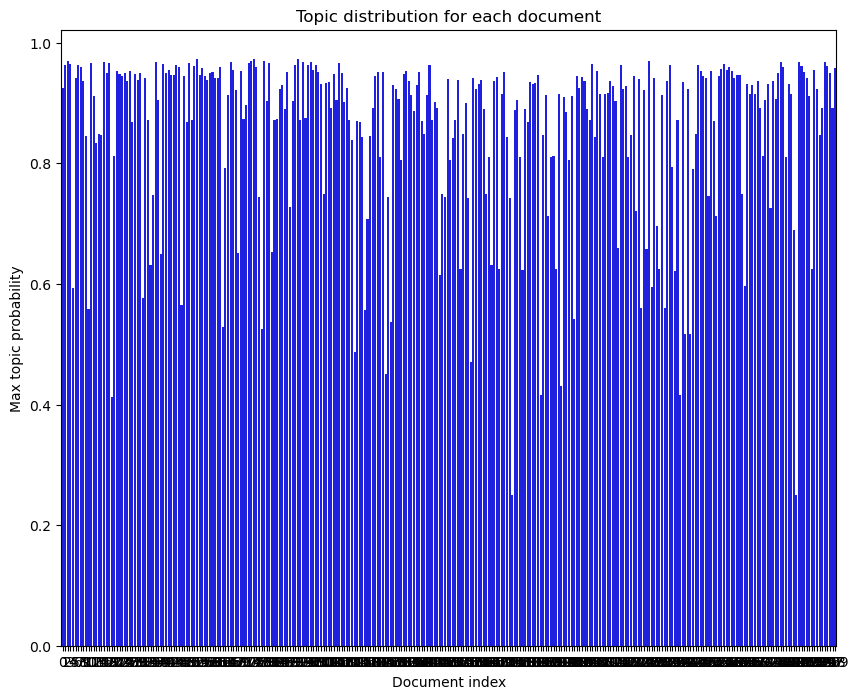

In [27]:
# Plot topic distribution for each document
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=np.arange(lda_Z_Dist.shape[0]), y=np.max(lda_Z_Dist, axis=1), color='blue', ax=ax)
ax.set_xlabel('Document index')
ax.set_ylabel('Max topic probability')
ax.set_title('Topic distribution for each document')
plt.show()

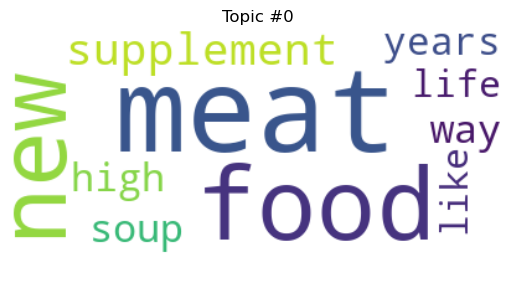

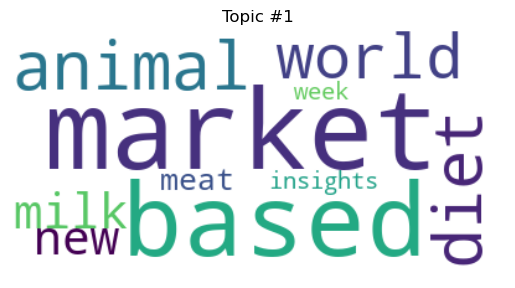

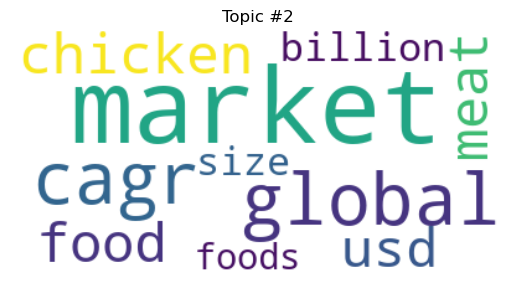

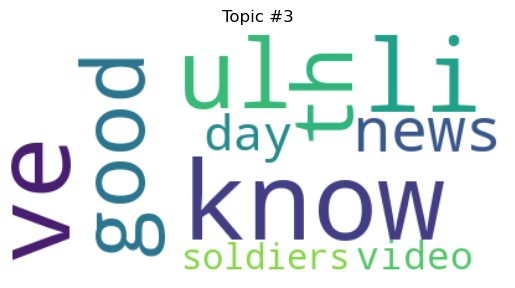

In [28]:
# get the topic-word distributions from the LDA model
topic_word_dists = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]

# create a dictionary of topic keywords and their corresponding weights
topic_keywords = {}
for i, topic_dist in enumerate(topic_word_dists):
    topic_keywords[i] = {CountVec_tweet.get_feature_names_out()[j]: topic_dist[j] for j in topic_dist.argsort()[:-11:-1]}

# create a WordCloud object for each topic
for topic_idx, keywords in topic_keywords.items():
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(keywords)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic #{topic_idx}")
    plt.show()
#In this example, we first calculate the topic-word distributions from the LDA model by normalizing the components_ attribute. We then create a dictionary of topic keywords and their corresponding weights by looping over the topics and sorting the topic-word distributions in descending order. Finally, we create a WordCloud object for each topic by passing the corresponding dictionary of keywords to the generate_from_frequencies() method, and plot it using the imshow() method of Matplotlib.


In [29]:
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
import pyLDAvis.sklearn as LDAvis
import pyLDAvis
import pyLDAvis.gensim_models

### conda install -c conda-forge pyldavis
pyLDAvis.enable_notebook()
panel = LDAvis.prepare(lda_model, CountVec_tweet_Fit, CountVec_tweet)
pyLDAvis.save_html(panel, "InTheNews.html")

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
vis_data = pyLDAvis.sklearn.prepare(lda_model,CountVec_tweet_Fit,CountVec_tweet)

In [ ]:
#!pip install --upgrade pyLDAvis==3.4.0

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
coherence_scores = []
coherence_model = CoherenceModel(corpus = Final_CountVec_tweet_DF,model=lda_model, coherence="u_mass")
coherence_score = coherence_model.get_coherence()
coherence_scores.append(coherence_score)

plt.plot(range(2, 11), coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Topic Coherence")